# 12.8 Additional material

This section contains additional material concerning confidence intervals for a fitted value and reference ranges. These are useful topics in regression, but will not be examinable. 


## 12.8.1 Confidence intervals for a fitted value 

So far we have only discussed conducting inference on the estimated regression coefficients. However, it may also be of interest to determine **confidence intervals for the fitted outcomes**, or **prediction intervals**. The subsequent two sections describe and illustrate these two concepts, respectively. 

Rather than focusing on associations between variables and the outcome, we are sometimes interested in the expected value of the outcome at particular values of $X$, i.e. $y_x = E[Y | X=x] = \beta_0+\beta_1 x$. 

The fitted value is our estimate of this quantity, 

$$
\hat{y}_x = \hat{\beta}_0 + \hat{\beta}_1 x.
$$

The variance of the fitted value is given by:

$$
V(\hat{y}_x) = \sigma^2 \left(\frac{1}{n}+\frac{(x-\bar{x})^2}{SS_{xx}}\right)
$$

where $SS_{xx}=\sum_{i=1}^n(x_i-\bar{x})^2$, i.e. the sum of squares of $X$.  

The 95% confidence interval for the fitted value is given by:

$$
\hat{y_x} \pm t_{n-2, 0.975}\hat{\sigma} \sqrt{\frac{1}{n}+ \frac{(x-\bar{x})^2}{SS_{xx}}}
$$

* 95% confidence intervals can be obtained for values of the independent variable that do not arise in the data. However, the width of the confidence interval increases with the distance from the mean (as can be seem from the formula and figure given below). 
* Care must be taken when extrapolating outside the range of the observed data as this makes an un-testable assumption that linearity continues outside the observed data range. 

*Example*. The R code below calculates a 95% confidence interval for the fitted value of birthweight of a baby born after 280 gestational days. 
 

###  Example

We return to our first example, exploring the association between birthweight and length of pregnancy (gestational days).Suppose we are interested in the expected birthweight for a baby who is born at 280 days' gestation. 

The code below refits our model and uses it to estimate the expected birthweight for this gestational age. It also provides a 95% confidence interval around that estimate.

In [1]:
# Refit model
data<- read.csv('https://www.inferentialthinking.com/data/baby.csv')
model1<-lm(Birth.Weight~Gestational.Days, data=data)

# Confidence interval for a fitted value 
new.data<-data.frame(Gestational.Days=280)
predict(model1, newdata=new.data, interval="confidence", level=0.95)

fit,lwr,upr
119.8818,118.9215,120.8421


We estimate that the expected (average) birthweight for babies born at 280 days' gestation is 119.9oz. The 95% confidence interval for this estimate is is (118.9, 120.8). Informally, we can interpret this as: it is plausible that the true value of the expected birthweight, for babies born at 280 days' gestation, lies between 118.9oz and 120.8oz.  


We can extend this idea to graph the fitted values - estimated expected birthweight - and their confidence intervals across the range of gestational days. The code below does this.

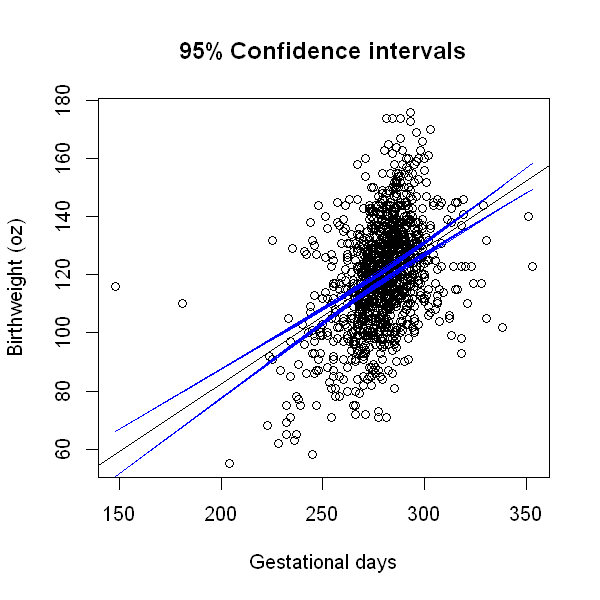

In [2]:
options(repr.plot.height=5, repr.plot.width=5)

# Plot the fitted regression line (the fitted values)
plot(data$Gestational.Days, data$Birth.Weight, xlab="Gestational days", ylab="Birthweight (oz)", main="95% Confidence intervals")
abline(model1)

# Add the confidence intervals for the fitted regression line
conf_interval<-predict(model1, newdata=data, interval="confidence", level=0.95)
lines(data$Gestational.Days, conf_interval[,2], col="blue")
lines(data$Gestational.Days, conf_interval[,3], col="blue")

Notice how the confidence interval around the fitted line is narrowest in the centre of the x-axis, where most of our data are concentrated, and widest at the extremes. 

## 12.8.2 Prediction intervals

The 95% confidence interval around the fitted line describes our certainty about where the fitted line is (i.e. where the expected value is). 

Sometimes, we are not interested in the average outcome at a particular point, but the likely spread of values arount the average. In this case, we are interested in obtaining what is called a **prediction interval**, or **reference range**. 

A 95% prediction interval, or 95% reference range, is an interval within which 95% of future observations are expected to lie. 

The predicted value for an individual with $X=x$ is the fitted value, as above. However, there are now two sourcces of uncertainty to take into account. (1) There is uncertainty about the fitted value (the expected value), as above. (2) There is random error around that point ($\sigma^2$). Thus, the variance in the individual prediction is given by:

$$
\begin{align*}
V(\hat{y_x}) + \sigma^2 &= \sigma^2 \left(\frac{1}{n}+\frac{(x-\bar{x})^2}{SS_{xx}}\right)+ \sigma^2 \\
 & = \sigma^2\left(1+\frac{1}{n}+\frac{(x-\bar{x})^2}{S_{xx}}\right)
\end{align*}
$$


A 95\% prediction interval is then given by: 

$$
\hat{y_x} \pm t_{n-2, 0.975} \hat{\sigma} \sqrt{1+ \frac{1}{n}+ \frac{(x-\bar{x})^2}{S_{xx}}}
$$

### Example

The R code below calculates a 95\% prediction interval for the birthweight of babies who are born at 280 days' gestation.

In [3]:
# Prediction interval
predict(model1, newdata=new.data, interval="prediction", level=0.95)

fit,lwr,upr
119.8818,87.01496,152.7486


The 95% prediction interval for babies born at 280 days' gestation is (87.0, 152.7). This means that we would expect 95% of babies born after 280 gestational days to weigh between 87 and 152.7 ounces. 

## 12.8.3 Comparing intervals

The code below produces two scatterplots of gestational days against birthweight with the linear regression line of best fit (obtained from Model 1) superimposed. The blue lines on the left-hand side plot represent the 95% confidence intervals for the fitted values across the entire range of gestational days. The blue lines on the right-hand side plot represent the 95% prediction intervals. 


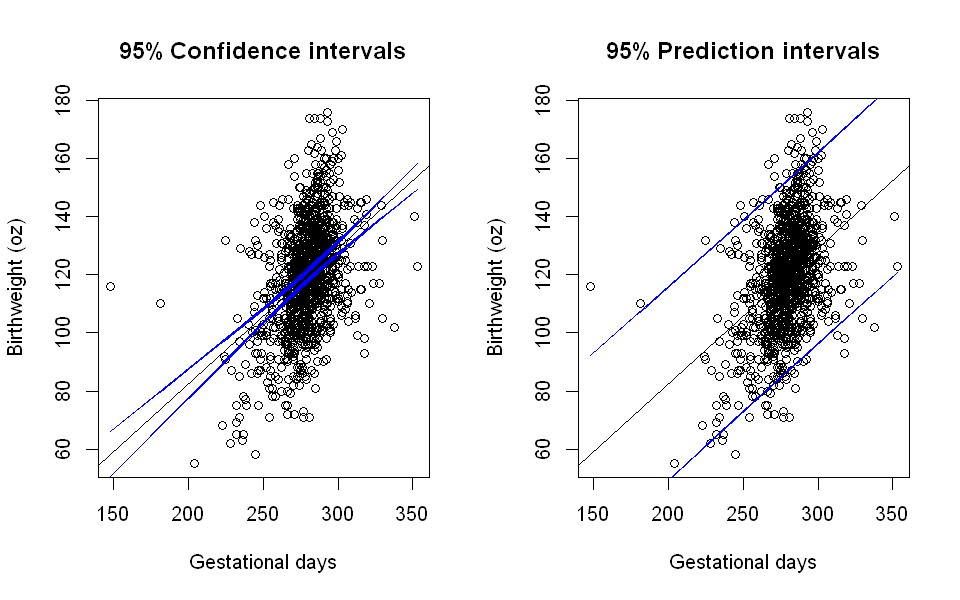

In [4]:
#Set the graphical space so that two plots are shown side-by-side in one row
par(mfrow=c(1,2))
options(repr.plot.height=5, repr.plot.width=8)

#Confidence intervals for predicted values
plot(data$Gestational.Days, data$Birth.Weight, xlab="Gestational days", ylab="Birthweight (oz)", main="95% Confidence intervals")
abline(model1)

conf_interval<-predict(model1, newdata=data, interval="confidence", level=0.95)
lines(data$Gestational.Days, conf_interval[,2], col="blue")
lines(data$Gestational.Days, conf_interval[,3], col="blue")

#Reference ranges
plot(data$Gestational.Days, data$Birth.Weight, xlab="Gestational days", ylab="Birthweight (oz)", main="95% Prediction intervals")
abline(model1)

conf_interval<-predict(model1, newdata=data, interval="prediction", level=0.95)
lines(data$Gestational.Days, conf_interval[,2], col="blue")
lines(data$Gestational.Days, conf_interval[,3], col="blue")

As expected, we see that the prediction interval is much wider. Loosely speaking, the plot on the left shows a range of uncertainty about where the *average* line is. The plot on the right shows a range of uncertainty about where individual measurements will lie.